## Import modules

In [1]:
#import module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Check data and if any null

In [2]:
data1= pd.read_csv("CarPrice_Assignment.csv")
data1
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [3]:
#pd.isnull(data1).any()#check if any is null
data1.isna().sum()#checking for null

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
data1.T

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
car_ID,1,2,3,4,5,6,7,8,9,10,...,196,197,198,199,200,201,202,203,204,205
symboling,3,3,1,2,2,2,1,1,1,0,...,-1,-2,-1,-2,-1,-1,-1,-1,-1,-1
CarName,alfa-romero giulia,alfa-romero stelvio,alfa-romero Quadrifoglio,audi 100 ls,audi 100ls,audi fox,audi 100ls,audi 5000,audi 4000,audi 5000s (diesel),...,volvo 144ea,volvo 244dl,volvo 245,volvo 264gl,volvo diesel,volvo 145e (sw),volvo 144ea,volvo 244dl,volvo 246,volvo 264gl
fueltype,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,...,gas,gas,gas,gas,gas,gas,gas,gas,diesel,gas
aspiration,std,std,std,std,std,std,std,std,turbo,turbo,...,std,std,std,turbo,turbo,std,turbo,std,turbo,turbo
doornumber,two,two,two,four,four,two,four,four,four,two,...,four,four,four,four,four,four,four,four,four,four
carbody,convertible,convertible,hatchback,sedan,sedan,sedan,sedan,wagon,sedan,hatchback,...,wagon,sedan,wagon,sedan,wagon,sedan,sedan,sedan,sedan,sedan
drivewheel,rwd,rwd,rwd,fwd,4wd,fwd,fwd,fwd,fwd,4wd,...,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd
enginelocation,front,front,front,front,front,front,front,front,front,front,...,front,front,front,front,front,front,front,front,front,front
wheelbase,88.6,88.6,94.5,99.8,99.4,99.8,105.8,105.8,105.8,99.5,...,104.3,104.3,104.3,104.3,104.3,109.1,109.1,109.1,109.1,109.1


In [5]:
data1.describe().T#T means Transpose

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [5]:
data1.columns.values#get the columns head

array(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price'], dtype=object)

In [6]:
colums= data1.columns.tolist()#get colums to a list
colums

['car_ID',
 'symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

## data visualization and preprocessing

<AxesSubplot:xlabel='price', ylabel='Count'>

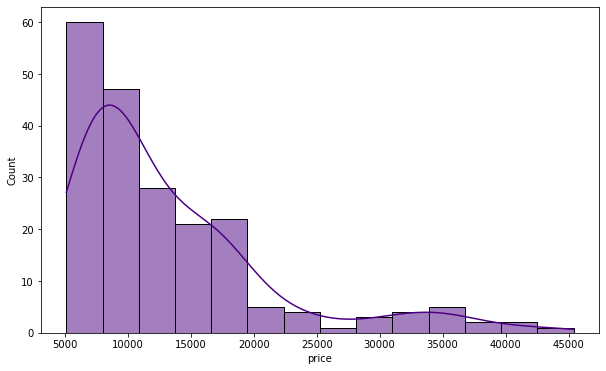

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(data1["price"], kde = True, color = "indigo")


(array([83., 45., 35., 18.,  6.,  3.,  5.,  7.,  2.,  1.]),
 array([ 5118. ,  9146.2, 13174.4, 17202.6, 21230.8, 25259. , 29287.2,
        33315.4, 37343.6, 41371.8, 45400. ]),
 <BarContainer object of 10 artists>)

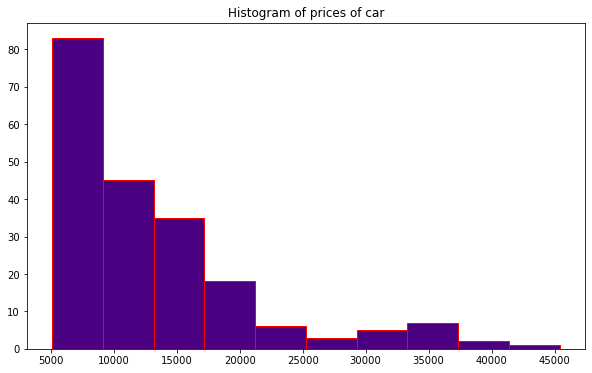

In [8]:
#Ploting Histogram of houses using prices
plt.figure(figsize=(10,6))
plt.title("Histogram of prices of car")
plt.hist(data1["price"],ec="red",color = "indigo") 

In [10]:
index_number = data1.index.tolist()#get index number  to a list
index_number

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [11]:
#selecting colums that have numerical variables
num_dat_var = data1.select_dtypes(exclude='object').columns
print("The number of numerical variables: ", len(num_dat_var))

The number of numerical variables:  16


In [12]:
## Getting the categorical variables(dummy_variables)
cat_data_var = data1.select_dtypes(exclude="number")
print("The number of categorical variables: ", len(cat_data_var))

The number of categorical variables:  205


## Getting correlation and pvalues for numerical variables

In [13]:
#Use Pearson correlation to quantify a relationship between two numerical  variables. If p-value is greater than 0.05,
#columns will be dropped
#stats.pearsonr(data1["symboling"], data1['price'])
### Droppping the insiginicant correlatation
insigni_ = []
for i in list(num_dat_var):
    coeff, p_value = stats.pearsonr(data1[i], data1['price'])#using stats.pearsonr to get the p-value and correlation 
    print(i.capitalize())
    print(f'Pearson Co-relation: {coeff}')
    print(f'P-Value: {p_value}')
    if p_value<0.05:
        print('Correlation is Significant')
    else:
        print('Correlation is Insignificant')
        insigni_.append(i)
    print('')

Car_id
Pearson Co-relation: -0.10909333948229953
P-Value: 0.11945179263824951
Correlation is Insignificant

Symboling
Pearson Co-relation: -0.07997822464270347
P-Value: 0.25431175848636967
Correlation is Insignificant

Wheelbase
Pearson Co-relation: 0.57781559829215
P-Value: 1.1828204863378005e-19
Correlation is Significant

Carlength
Pearson Co-relation: 0.6829200156779622
P-Value: 1.6787066240746602e-29
Correlation is Significant

Carwidth
Pearson Co-relation: 0.7593252997415114
P-Value: 9.627437876120389e-40
Correlation is Significant

Carheight
Pearson Co-relation: 0.11933622657049443
P-Value: 0.08832832352275669
Correlation is Insignificant

Curbweight
Pearson Co-relation: 0.8353048793372966
P-Value: 1.2144448264032206e-54
Correlation is Significant

Enginesize
Pearson Co-relation: 0.8741448025245117
P-Value: 1.3547637598648421e-65
Correlation is Significant

Boreratio
Pearson Co-relation: 0.5531732367984437
P-Value: 7.907922278249421e-18
Correlation is Significant

Stroke
Pearson

### Droping insignificant variables that have less than 0.05 pvalues

In [14]:
insigni_

['car_ID', 'symboling', 'carheight', 'stroke', 'compressionratio', 'peakrpm']

In [15]:
new_data,cop_data = data1.copy(),data1.copy()
new_data
cop_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [16]:
for i in insigni_:
    cop_data.drop(i,axis = 1,inplace= True)
cop_data

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500.0
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,30,13950.0
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,2952,ohc,four,141,mpfi,3.78,114,23,28,16845.0
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,3049,ohc,four,141,mpfi,3.78,160,19,25,19045.0
202,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,3012,ohcv,six,173,mpfi,3.58,134,18,23,21485.0
203,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,3217,ohc,six,145,idi,3.01,106,26,27,22470.0


### Getting Heat map for the correlation

In [17]:
cop_data.corr()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.776386,0.569329,0.488750,0.353294,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.877728,0.683360,0.606454,0.552623,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.867032,0.735433,0.559150,0.640732,-0.642704,-0.677218,0.759325
curbweight,0.776386,0.877728,0.867032,1.000000,0.850594,0.648480,0.750739,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.850594,1.000000,0.583774,0.809769,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.648480,0.583774,1.000000,0.573677,-0.584532,-0.587012,0.553173
horsepower,0.353294,0.552623,0.640732,0.750739,0.809769,0.573677,1.000000,-0.801456,-0.770544,0.808139
citympg,-0.470414,-0.670909,-0.642704,-0.757414,-0.653658,-0.584532,-0.801456,1.000000,0.971337,-0.685751
highwaympg,-0.544082,-0.704662,-0.677218,-0.797465,-0.677470,-0.587012,-0.770544,0.971337,1.000000,-0.697599
price,0.577816,0.682920,0.759325,0.835305,0.874145,0.553173,0.808139,-0.685751,-0.697599,1.000000


In [18]:
mask = np.zeros_like(cop_data.corr())
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [19]:
#Grap upper part of a matric
upper_part = np.triu_indices_from(mask)
mask[upper_part] = 1
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

<AxesSubplot:>

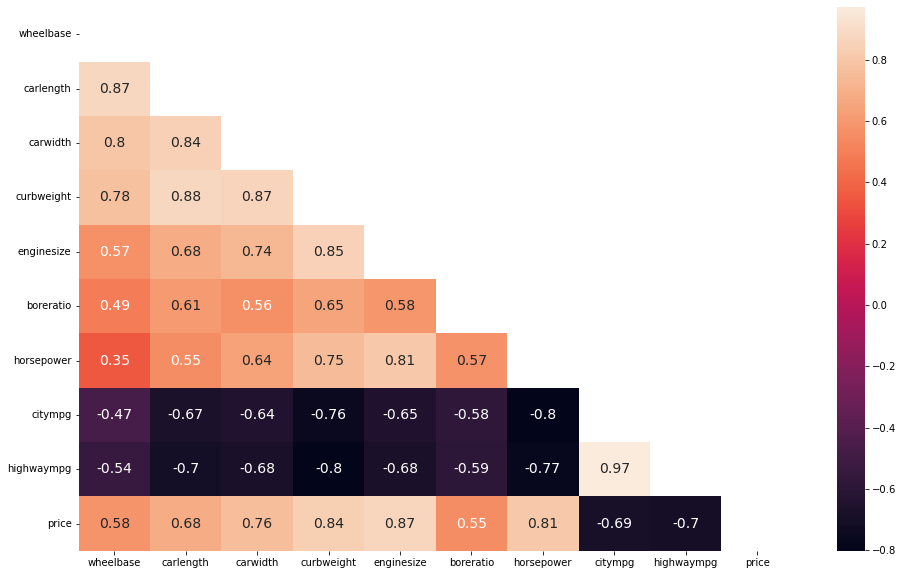

In [20]:
plt.figure(figsize = (16,10))
sns.heatmap(cop_data.corr(),mask = mask, annot =True, annot_kws={"size":14} )
#set title

## Create new category to classify car value (Low,Medium,High)

In [21]:

car_name_price = data1.groupby("CarName")["price"].mean()#grouping the data using Car_Name
car_name_price.reset_index()#use to sort out the index of new_data.shape

,CarName,price
0,Nissan versa,5499.0
1,alfa-romero Quadrifoglio,16500.0
2,alfa-romero giulia,13495.0
3,alfa-romero stelvio,16500.0
4,audi 100 ls,13950.0
...,...,...
142,volvo 246,22470.0
143,volvo 264gl,20522.5
144,volvo diesel,18950.0
145,vw dasher,11595.0


In [22]:
# merge data with 
merge_data = new_data.merge(car_name_price.reset_index(), how = 'left', on = 'CarName')
merge_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price_x,price_y
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,17580.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,14892.5
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,16230.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,18735.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,22470.0


## Convert categorical variables to numerical variables, check their correlation and drop insignificant values

In [23]:
bins = [0,10000,20000,40000]
label =['Budget_Friendly','Medium_Range','Expensive_Cars']
new_data['Category'] = pd.cut(merge_data['price_y'],bins, right=False, labels=label)
new_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Category
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,Medium_Range
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,Medium_Range
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Medium_Range
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,Medium_Range
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,Medium_Range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,Medium_Range
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,Medium_Range
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,Medium_Range
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,Expensive_Cars


In [24]:
data_dummy = pd.get_dummies(new_data,drop_first=True)#categorise and drop k_1 dummies value to avoild multicollinearity
dummy_data_col = list(data_dummy.columns.values)
data_update = data_dummy.copy()
len(dummy_data_col)

193

In [25]:
for i in dummy_data_col:
    coeff,p_value = stats.pearsonr(data_dummy[i],data_dummy["price"])
    print(i.capitalize())
    print(f"Pearson Co-relation: {coeff}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print("correlation is significant")
    else:
        print("correlation is insignificant")
        data_dummy.drop(i,axis =1, inplace = True)
    print('')       

Car_id
Pearson Co-relation: -0.10909333948229953
P-value: 0.11945179263824951
correlation is insignificant

Symboling
Pearson Co-relation: -0.07997822464270347
P-value: 0.25431175848636967
correlation is insignificant

Wheelbase
Pearson Co-relation: 0.57781559829215
P-value: 1.1828204863378005e-19
correlation is significant

Carlength
Pearson Co-relation: 0.6829200156779622
P-value: 1.6787066240746602e-29
correlation is significant

Carwidth
Pearson Co-relation: 0.7593252997415114
P-value: 9.627437876120389e-40
correlation is significant

Carheight
Pearson Co-relation: 0.11933622657049443
P-value: 0.08832832352275669
correlation is insignificant

Curbweight
Pearson Co-relation: 0.8353048793372966
P-value: 1.2144448264032206e-54
correlation is significant

Enginesize
Pearson Co-relation: 0.8741448025245117
P-value: 1.3547637598648421e-65
correlation is significant

Boreratio
Pearson Co-relation: 0.5531732367984437
P-value: 7.907922278249421e-18
correlation is significant

Stroke
Pearson

correlation is insignificant

Carname_nissan teana
Pearson Co-relation: 0.03445894738792388
P-value: 0.6237759667470872
correlation is insignificant

Carname_nissan titan
Pearson Co-relation: -0.052077407945336024
P-value: 0.45834242499120015
correlation is insignificant

Carname_peugeot 304
Pearson Co-relation: -0.000673934335701135
P-value: 0.9923481893816157
correlation is insignificant

Carname_peugeot 504
Pearson Co-relation: 0.04704396044961303
P-value: 0.5029729851166426
correlation is insignificant

Carname_peugeot 504 (sw)
Pearson Co-relation: -0.007350851092379055
P-value: 0.9166884392359999
correlation is insignificant

Carname_peugeot 505s turbo diesel
Pearson Co-relation: 0.033369555706571165
P-value: 0.6347939924644341
correlation is insignificant

Carname_peugeot 604sl
Pearson Co-relation: 0.0529125301519501
P-value: 0.4511569047080099
correlation is insignificant

Carname_plymouth cricket
Pearson Co-relation: -0.046735874539993685
P-value: 0.5057768366510453
correlation

<AxesSubplot:>

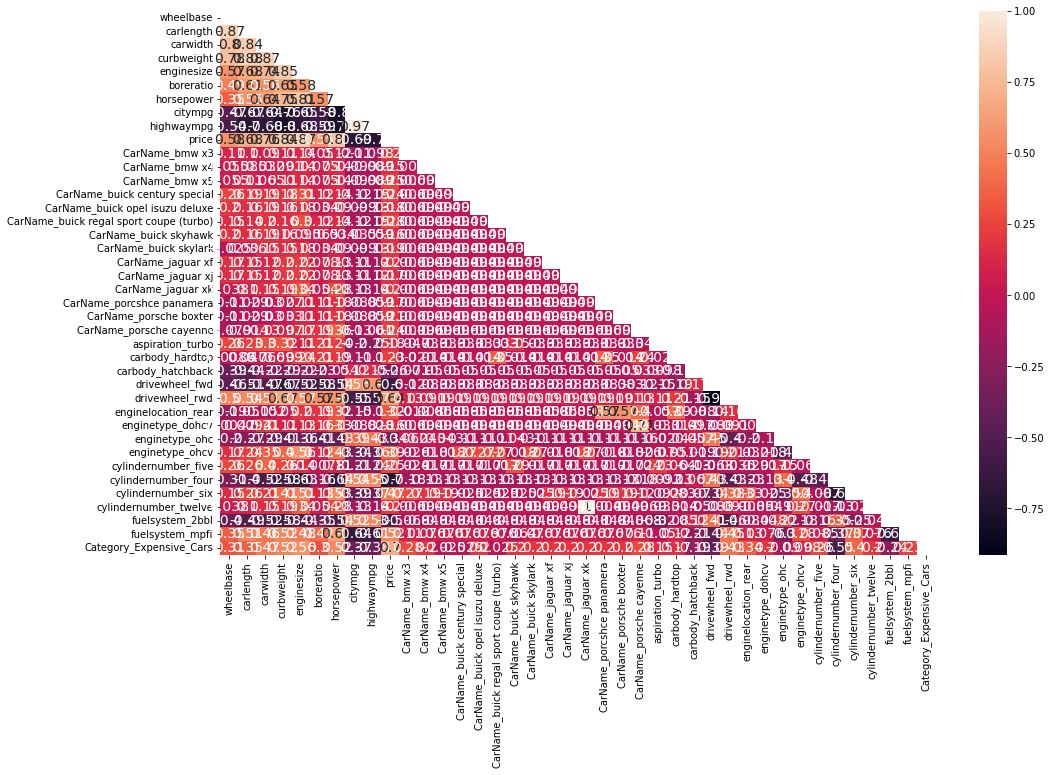

In [26]:
new_mask = np.zeros_like(data_dummy.corr())
new_mask
upper_part = np.triu_indices_from(new_mask)
new_mask[upper_part] = 1
new_mask
plt.figure(figsize = (16,10))
sns.heatmap(data_dummy.corr(),mask = new_mask, annot =True, annot_kws={"size":14} )

In [27]:
data_dummy.T

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
wheelbase,88.60,88.60,94.50,99.80,99.40,99.80,105.80,105.80,105.80,99.500,...,104.30,104.30,104.30,104.30,104.30,109.10,109.10,109.10,109.10,109.10
carlength,168.80,168.80,171.20,176.60,176.60,177.30,192.70,192.70,192.70,178.200,...,188.80,188.80,188.80,188.80,188.80,188.80,188.80,188.80,188.80,188.80
carwidth,64.10,64.10,65.50,66.20,66.40,66.30,71.40,71.40,71.40,67.900,...,67.20,67.20,67.20,67.20,67.20,68.90,68.80,68.90,68.90,68.90
curbweight,2548.00,2548.00,2823.00,2337.00,2824.00,2507.00,2844.00,2954.00,3086.00,3053.000,...,3034.00,2935.00,3042.00,3045.00,3157.00,2952.00,3049.00,3012.00,3217.00,3062.00
enginesize,130.00,130.00,152.00,109.00,136.00,136.00,136.00,136.00,131.00,131.000,...,141.00,141.00,141.00,130.00,130.00,141.00,141.00,173.00,145.00,141.00
boreratio,3.47,3.47,2.68,3.19,3.19,3.19,3.19,3.19,3.13,3.130,...,3.78,3.78,3.78,3.62,3.62,3.78,3.78,3.58,3.01,3.78
horsepower,111.00,111.00,154.00,102.00,115.00,110.00,110.00,110.00,140.00,160.000,...,114.00,114.00,114.00,162.00,162.00,114.00,160.00,134.00,106.00,114.00
citympg,21.00,21.00,19.00,24.00,18.00,19.00,19.00,19.00,17.00,16.000,...,23.00,24.00,24.00,17.00,17.00,23.00,19.00,18.00,26.00,19.00
highwaympg,27.00,27.00,26.00,30.00,22.00,25.00,25.00,25.00,20.00,22.000,...,28.00,28.00,28.00,22.00,22.00,28.00,25.00,23.00,27.00,25.00
price,13495.00,16500.00,16500.00,13950.00,17450.00,15250.00,17710.00,18920.00,23875.00,17859.167,...,13415.00,15985.00,16515.00,18420.00,18950.00,16845.00,19045.00,21485.00,22470.00,22625.00


### Splitting the Data

In [28]:
price = data_dummy["price"]
features = data_dummy.drop("price",axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(features,price,
                                                  test_size =0.2,random_state=10)
X_test.shape

(41, 39)

### Multivariable Regression

In [29]:
regr = LinearRegression()
regr.fit(X_train,Y_train)
print(regr.coef_)
print(regr.intercept_)
print("Training Data R_square :", f"{round(regr.score(X_train,Y_train)*100,2)}%")
print("Test Data R_square :", f"{round(regr.score(X_test,Y_test)*100,2)}%")
pd.DataFrame(data = regr.coef_, index=X_train.columns, columns = ["coef"])

[ 9.56666618e+01 -3.68894665e+01  4.77550854e+02  3.95281858e+00
 -3.76978926e+00  3.99491022e+02  5.05693552e+01 -6.26932551e+01
  1.38605964e+02  4.69733954e+03  5.45372219e+03  2.07818170e+04
  1.29946493e+04  2.66029087e+03  1.93095064e+04  0.00000000e+00
  5.31778839e+03  6.76099936e+03  3.46099936e+03 -9.09494702e-13
  1.35050646e+03  4.89776940e+03  2.85050646e+03 -3.34986907e+02
 -7.78813045e+02 -7.05897250e+02 -3.44530051e+02  2.22451599e+02
  9.09878233e+03  0.00000000e+00  7.91760221e+02  1.77958563e+03
 -7.64956874e+02 -2.83185993e+03 -2.34351422e+03  0.00000000e+00
 -4.83688413e+02  5.45900905e+02  5.66649903e+03]
-39130.09952939497
Training Data R_square : 96.25%
Test Data R_square : 89.56%


,coef
wheelbase,9.566666e+01
carlength,-3.688947e+01
carwidth,4.775509e+02
curbweight,3.952819e+00
enginesize,-3.769789e+00
boreratio,3.994910e+02
horsepower,5.056936e+01
citympg,-6.269326e+01
highwaympg,1.386060e+02
CarName_bmw x3,4.697340e+03


In [30]:
x_include_constant=sm.add_constant(X_train)#add intercept
model = sm.OLS(Y_train,x_include_constant)#OLS----ordinary least square
results = model.fit()
results.params#The linear coefficients that minimize the least squares criterion. 
#results.pvalues#pvalues to determine significant data, a value greater than 0.05 is less significant
pd.DataFrame({"coef":results.params})  

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,coef
const,-3.913010e+04
wheelbase,9.566666e+01
carlength,-3.688947e+01
carwidth,4.775509e+02
curbweight,3.952819e+00
enginesize,-3.769789e+00
boreratio,3.994910e+02
horsepower,5.056936e+01
citympg,-6.269326e+01
highwaympg,1.386060e+02


### Testing for multicollinearity

In [31]:
# Variance Inflation Factor

In [32]:
len(x_include_constant.columns)

40

In [33]:
VIF = [variance_inflation_factor(exog = x_include_constant.values,
                              exog_idx = i) for i in range(len(x_include_constant.columns)) ]
pd.DataFrame({"coef_name" : x_include_constant.columns, "vif" : np.around(VIF,2)})

C:\Users\user\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\user\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,coef_name,vif
0,const,5807.40
1,wheelbase,9.84
2,carlength,13.40
3,carwidth,10.12
4,curbweight,28.67
5,enginesize,44.00
6,boreratio,6.90
7,horsepower,16.17
8,citympg,31.46
9,highwaympg,32.28


## Model simplication and Baysian informative criterion( to help to compare and select model)

In [34]:
x_include_constant=sm.add_constant(X_train)#add intercept
model = sm.OLS(Y_train,x_include_constant)#OLS----ordinary least square
results = model.fit()
print("BIC is ", results.bic)
print("r-squared is ", results.rsquared)
results.summary()

BIC is  3059.1075818122245
r-squared is  0.9625060062252282


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     97.40
Date:                Sun, 29 May 2022   Prob (F-statistic):           1.73e-76
Time:                        21:43:04   Log-Likelihood:                -1440.3
No. Observations:                 164   AIC:                             2951.
Df Residuals:                     129   BIC:                             3059.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                   -3.913e+04   1.06e+04     -3.698      0.000   -6.01e+04   -1.82e+04
wheelbase                                  95.6667     71.999      1.329      0.186     -46.785     238.118
carlength                                 -36.8895     40.248     -0.917      0.361    -116.521      42.742
carwidth                                  477.5509    212.292      2.250      0.026      57.526     897.575
curbweight                                  3.9528      1.451      2.723      0.007       1.081       6.824
enginesize                                 -3.7698     22.655     -0.166      0.868     -48.593      41.053
boreratio                                 399.4910   1338.153      0.299      0.766   -2248.077    3047.059
horsepower                                 50.5694     15.157      3.336      0.001      20.581      80.557
citympg                                   -62.6933    119.104     -0.526      0.600    -298.343     172.956
highwaympg                                138.6060    113.956      1.216      0.226     -86.858     364.070
CarName_bmw x3                           4697.3395   1596.281      2.943      0.004    1539.059    7855.620
CarName_bmw x4                           5453.7222   2107.667      2.588      0.011    1283.651    9623.793
CarName_bmw x5                           2.078e+04   2074.087     10.020      0.000    1.67e+04    2.49e+04
CarName_buick century special            1.299e+04   4937.144      2.632      0.010    3226.388    2.28e+04
CarName_buick opel isuzu deluxe          2660.2909   4180.874      0.636      0.526   -5611.671    1.09e+04
CarName_buick regal sport coupe (turbo)  1.931e+04   4711.660      4.098      0.000    9987.372    2.86e+04
CarName_buick skyhawk                   -3.273e-13   3.99e-12     -0.082      0.935   -8.22e-12    7.57e-12
CarName_buick skylark                    5317.7884   4012.273      1.325      0.187   -2620.593    1.33e+04
CarName_jaguar xf                        6760.9994   2527.247      2.675      0.008    1760.779    1.18e+04
CarName_jaguar xj                        3460.9994   2527.247      1.369      0.173   -1539.221    8461.220
CarName_jaguar xk                       -4.645e-13   1.87e-12     -0.249      0.804   -4.16e-12    3.23e-12
CarName_porcshce panamera                1350.5065   1581.217      0.854      0.395   -1777.970    4478.983
CarName_porsche boxter                   4897.7694   1606.573      3.049      0.003    1719.125    8076.413
CarName_porsche cayenne                  2850.5065   1581.217      1.803      0.074    -277.970    5978.983
aspiration_turbo                         -334.9869    609.256     -0.550      0.583   -1540.415     870.441
carbody_hardtop                          -778.8130    986.8

In [35]:
price = data_dummy["price"]
features = data_dummy.drop(["price","cylindernumber_twelve","cylindernumber_six","cylindernumber_four",
                            "CarName_buick skyhawk","enginetype_dohcv","enginelocation_rear",
                            "CarName_porsche boxter","CarName_porsche boxter","CarName_porcshce panamera","CarName_jaguar xk" ],axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(features,price,
                                                  test_size =0.2,random_state=10)

In [36]:
regr = LinearRegression()
regr.fit(X_train,Y_train)
print(regr.coef_)
print(regr.intercept_)
print("Training Data R_square :", f"{round(regr.score(X_train,Y_train)*100,2)}%")
print("Test Data R_square :", f"{round(regr.score(X_test,Y_test)*100,2)}%")
pd.DataFrame(data = regr.coef_, index=X_train.columns, columns = ["coef"])

[ 7.66964559e+01 -4.77428868e+01  3.59926963e+02  3.71800405e+00
 -1.73746668e+00  7.44848085e+01  8.56877994e+01 -1.62715392e+02
  2.76634925e+02  2.24533941e+03  1.90479130e+03  1.95366097e+04
  1.59767329e+04  4.32809813e+03  2.15442287e+04  6.22906700e+03
  3.25410578e+03 -4.58942212e+01  4.78182973e+03 -1.53462866e+03
 -2.96906272e+02 -1.03870664e+03 -3.96083621e+02  7.84046598e+01
 -4.03796804e+02  1.69805543e+02  1.90036759e+03 -9.37575886e+02
 -2.64632060e+02  7.76528014e+03]
-32307.197769811268
Training Data R_square : 94.88%
Test Data R_square : 80.25%


,coef
wheelbase,76.696456
carlength,-47.742887
carwidth,359.926963
curbweight,3.718004
enginesize,-1.737467
boreratio,74.484808
horsepower,85.687799
citympg,-162.715392
highwaympg,276.634925
CarName_bmw x3,2245.339410


## Transforming Data

### Checking for price skewness

In [37]:
data1.price.skew()

1.7776781560914454

In [38]:
log_price = np.log(data_dummy["price"])
log_price.skew()

0.672888533977329

## Multivariable Regression using transformed price

In [39]:

X_train, X_test, log_Y_train, log_Y_test = train_test_split(features,log_price,
                                                   test_size =0.2,random_state=10)
X_test.shape

(41, 30)

In [40]:
regr = LinearRegression()
regr.fit(X_train,log_Y_train)
print(regr.coef_)
print(regr.intercept_)
print("Training Data R_square for transform price :", f"{round(regr.score(X_train,log_Y_train)*100,2)}%")
print("Test Data R_square for transform price :", f"{round(regr.score(X_test,log_Y_test)*100,2)}%")
pd.DataFrame(data = regr.coef_, index=X_train.columns+"trans", columns = ["coef"])

[ 2.06062098e-03  5.90194976e-04  2.04868586e-02  3.20490101e-04
 -3.84693522e-04  3.20930890e-02  4.56390819e-03 -1.98857812e-02
  2.14007909e-02  1.55324609e-02 -2.72262378e-02  5.48133023e-01
  3.19402869e-01 -3.59640707e-02  5.45878338e-01  8.37493462e-02
 -1.29775390e-01 -2.27197503e-01  1.97189612e-01 -6.25427945e-02
 -4.83612449e-02 -8.01654318e-02 -5.37640668e-02 -2.37898283e-03
  1.15729527e-02  5.46872181e-02  1.03682338e-01 -1.33832060e-01
  6.02782493e-03  3.51742085e-01]
6.244605566132596
Training Data R_square for transform price : 93.23%
Test Data R_square for transform price : 78.0%


,coef
wheelbasetrans,0.002061
carlengthtrans,0.000590
carwidthtrans,0.020487
curbweighttrans,0.000320
enginesizetrans,-0.000385
boreratiotrans,0.032093
horsepowertrans,0.004564
citympgtrans,-0.019886
highwaympgtrans,0.021401
CarName_bmw x3trans,0.015532


### Using normal _original data and converting categorical variables into dummy variables

In [41]:
dummy = pd.get_dummies(data1,drop_first=True)#categorise and drop k_1 dummies value to avoild multicollinearity
dummy_col = list(dummy.columns.values)
len(dummy_data_col)

193

In [42]:
for i in dummy_col:
    coeff,p_value = stats.pearsonr(dummy[i],dummy["price"])
    print(i.capitalize())
    print(f"Pearson Co-relation: {coeff}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print("correlation is significant")
    else:
        print("correlation is insignificant")
        dummy.drop(i,axis =1, inplace = True)
    print('') 

Car_id
Pearson Co-relation: -0.10909333948229953
P-value: 0.11945179263824951
correlation is insignificant

Symboling
Pearson Co-relation: -0.07997822464270347
P-value: 0.25431175848636967
correlation is insignificant

Wheelbase
Pearson Co-relation: 0.57781559829215
P-value: 1.1828204863378005e-19
correlation is significant

Carlength
Pearson Co-relation: 0.6829200156779622
P-value: 1.6787066240746602e-29
correlation is significant

Carwidth
Pearson Co-relation: 0.7593252997415114
P-value: 9.627437876120389e-40
correlation is significant

Carheight
Pearson Co-relation: 0.11933622657049443
P-value: 0.08832832352275669
correlation is insignificant

Curbweight
Pearson Co-relation: 0.8353048793372966
P-value: 1.2144448264032206e-54
correlation is significant

Enginesize
Pearson Co-relation: 0.8741448025245117
P-value: 1.3547637598648421e-65
correlation is significant

Boreratio
Pearson Co-relation: 0.5531732367984437
P-value: 7.907922278249421e-18
correlation is significant

Stroke
Pearson

Carname_nissan juke
Pearson Co-relation: -0.04812397039203988
P-value: 0.4932086986599182
correlation is insignificant

Carname_nissan kicks
Pearson Co-relation: 0.05642248935068019
P-value: 0.4216582357544549
correlation is insignificant

Carname_nissan latio
Pearson Co-relation: -0.07600938270773201
P-value: 0.27871879628067
correlation is insignificant

Carname_nissan leaf
Pearson Co-relation: -0.052516678784591146
P-value: 0.4545549554046998
correlation is insignificant

Carname_nissan note
Pearson Co-relation: -0.04636688703501938
P-value: 0.5091456616919263
correlation is insignificant

Carname_nissan nv200
Pearson Co-relation: -0.03274949101811047
P-value: 0.6411015364873889
correlation is insignificant

Carname_nissan otti
Pearson Co-relation: 0.0019529052830445197
P-value: 0.9778293241053038
correlation is insignificant

Carname_nissan rogue
Pearson Co-relation: -0.06822499515703145
P-value: 0.33105390242121036
correlation is insignificant

Carname_nissan teana
Pearson Co-rela

In [43]:
price = dummy["price"]
features = dummy.drop("price",axis = 1)
Xd_train, Xd_test, Yd_train, Yd_test = train_test_split(features,price,
                                                  test_size =0.2,random_state=10)
X_test.shape

(41, 30)

In [44]:
regr = LinearRegression()
regr.fit(Xd_train,Yd_train)
print(regr.coef_)
print(regr.intercept_)
print("Training Data R_square :", f"{round(regr.score(Xd_train,Yd_train)*100,2)}%")
print("Test Data R_square :", f"{round(regr.score(Xd_test,Yd_test)*100,2)}%")
pd.DataFrame(data = regr.coef_, index=Xd_train.columns, columns = ["coef"])

[ 3.17176877e+01 -7.19227421e+01  8.07998734e+02  4.58796293e+00
 -2.07216013e+01  2.43385092e+03  3.17616604e+01 -6.63581784e+01
  1.21922251e+02  7.18482116e+03  8.73309502e+03  1.81371310e+04
  1.95267969e+04  1.33614705e+04  2.47287216e+04 -3.63797881e-12
  1.44541658e+04  1.13782745e+04  8.07827448e+03  5.45696821e-12
  2.20942456e+03  5.91129168e+03  3.70942456e+03  8.41154622e+02
 -5.96262509e+02 -8.48354738e+02  4.52245515e+02  1.74129631e+03
  1.18301408e+04  0.00000000e+00  1.93025152e+03 -1.26875710e+03
  1.04573702e+03 -3.07786630e+03  1.37654658e+03  0.00000000e+00
 -8.01720072e+00  9.93056841e+02]
-54458.770779473074
Training Data R_square : 95.08%
Test Data R_square : 82.91%


,coef
wheelbase,3.171769e+01
carlength,-7.192274e+01
carwidth,8.079987e+02
curbweight,4.587963e+00
enginesize,-2.072160e+01
boreratio,2.433851e+03
horsepower,3.176166e+01
citympg,-6.635818e+01
highwaympg,1.219223e+02
CarName_bmw x3,7.184821e+03


### P_values and evaluating models

In [45]:
xd_include_constant=sm.add_constant(Xd_train)#add intercept
model = sm.OLS(Yd_train,xd_include_constant)#OLS----ordinary least square
results = model.fit()
results.params#The linear coefficients that minimize the least squares criterion. 
results.pvalues#pvalues to determine significant data, a value greater than 0.05 is less significant
pd.DataFrame({"coef":results.params,"p-value":round(results.pvalues,3)})  

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,coef,p-value
const,-5.445877e+04,0.000
wheelbase,3.171769e+01,0.697
carlength,-7.192274e+01,0.116
carwidth,8.079987e+02,0.001
curbweight,4.587963e+00,0.006
enginesize,-2.072160e+01,0.421
boreratio,2.433851e+03,0.103
horsepower,3.176166e+01,0.063
citympg,-6.635818e+01,0.626
highwaympg,1.219223e+02,0.350
